# K-Means from Scratch

### Exercise 1.04 from "The Unsupervised Learning Workshop" by Jones, Kruger, and Johnston

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
np.random.seed(0)
%matplotlib inline

## Generate a random cluster dataset to experiment

In [17]:
## X = coordinate points, y = cluster labels
## n_samples = total data points generated by blob
## centers determines the number of centroids for the blob
## n_feature defines the number of dimensions generated by the dataset
## random_state is set to 800 to allow for repeatability of data across iterations
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

In [18]:
print(X)

[[-3.83458347  6.09210705]
 [-4.62571831  5.54296865]
 [-2.87807159 -7.48754592]
 ...
 [-3.709726   -7.77993633]
 [-8.44553266 -1.83519866]
 [-4.68308431  6.91780744]]


## Display it in Matplotlib

C:\Users\j8k-o\AppData\Local\Temp\ipykernel_3356\1612923868.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], s=50,cmap='tab20b')


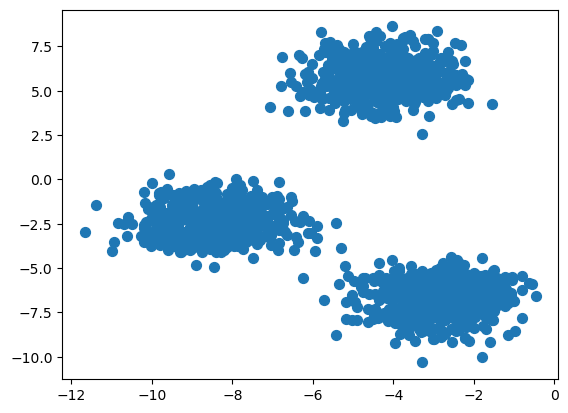

In [19]:
# Plot the coordinate points using the scatterplot funcitonality of pyplot
## Takes the input list of points and presents them graphically
plt.scatter(X[:,0], X[:,1], s=50,cmap='tab20b')
plt.show()

## Display it with labels as color

In [11]:
print(y) # labels to be set a c indicated in error above

[2 2 1 ... 1 0 2]


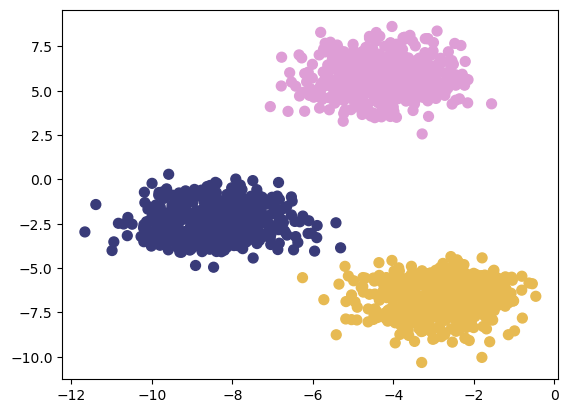

In [20]:
# Plot the coordinate points using the scatterplot funcitonality of pyplot with labelling 
## Takes the input list of points, and labels and presents them graphically
plt.scatter(X[:,0], X[:,1], c=y, s=50,cmap='tab20b')
plt.show()

## Use SciPy to calculate Euclidean Distance

In [21]:
from scipy.spatial.distance import cdist

In [22]:
# Select 5 data points 
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [23]:
# Calculate the distance and choose index of shortest distance as a cluster

"""
Finds the distance from each of the 5 sampled points to all centroids
"""
for x in X[105:110]:
    calcs = cdist(x.reshape([1,-1]),centroids).squeeze()
    print(calcs, "Cluster Membership: ", np.argmin(calcs))

[ 4.02775036 10.70202291  5.54216027] Cluster Membership:  0
[ 9.7303528   7.20866583 17.44505393] Cluster Membership:  1
[ 4.06676751 11.11317999  5.15897011] Cluster Membership:  0
[ 5.28441816  8.93146403 13.31415736] Cluster Membership:  0
[ 6.29310516 13.46792103  2.66429839] Cluster Membership:  2


## Define K-Means Function 

In [30]:
def k_means(X,K): 
    # Keep track of history so you can see K-Means in action 
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True: 
        # Euclidean distance calculated for each point relative to centroids, then np.argmin returns 
        # index locatoin of min distance = which cluster a point is assigned to
        labels = np.argmin(cdist(X,centroids), axis=1)
        labels_history.append(labels)
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and ends. Otherwise, continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels, centroids_history, labels_history

centers,labels, centers_hist,labels_hist = k_means(X,3)

In [1]:
print(centers_hist)

NameError: name 'centers_hist' is not defined

## Zip together historical steps and their labels

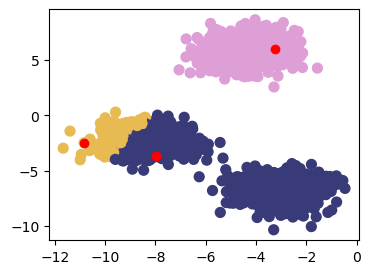

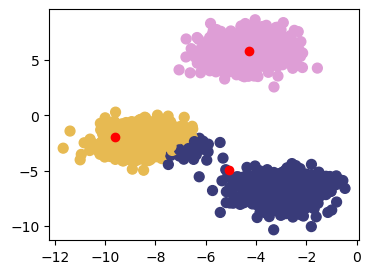

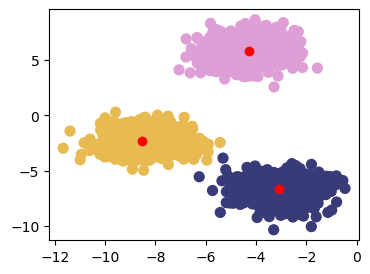

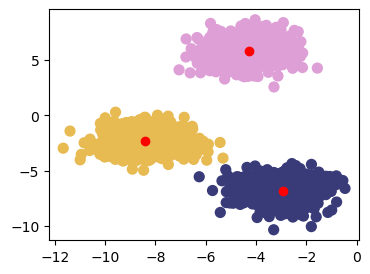

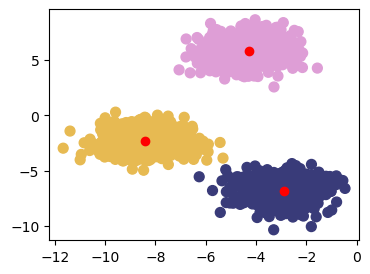

In [32]:

history = zip(centers_hist,labels_hist)
for x, y in history: 
    plt.figure(figsize=(4,3))
    plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='tab20b')
    plt.scatter(x[:,0], x[:,1], c="red")
    plt.show()